In [ ]:
#!pip install simpy
import simpy
import random
import numpy as np
import scipy as sp 
from scipy.stats import ttest_1samp, ttest_ind
import math
import matplotlib.pyplot as plt
from statsmodels.sandbox.stats.multicomp import multipletests


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
  class Service_station(object):

  def __init__(self, env, n_servers, mu):
    '''    
    Initialization enviroment, with servers
    S_n is the number of servers that will be created
    '''
    self.env = env
    self.servers = simpy.Resource(env, n_servers)
    self.mu = mu

  def serve(self, customer):
    '''
         Processes customer in prio time. 
             customer: referes to the customer that gets processed
    '''
    serving_time = random.expovariate(self.mu)
    yield self.env.timeout(serving_time) 
    print(f'The server processed the request of  {customer}')

def customer(env, name, Station, data):
  '''   
    requests that object gets processed by server
        data: list of waiting times
        mu: service rate
        prio: gets drawn form a Markov distribution with mu as mean. 
        
    Saves in data:
        waiting time: time betwee arrival to getting assigned to server. 
  '''
  print(f'{name} arrives to the Service station at {env.now}')
  start = env.now

  with Station.servers.request() as req:
    yield req
    print(f' The request of {name} is starting to be processed at {env.now}')
    end = env.now
    yield env.process(Station.serve(name))
    print(f'{name} leaves the service station at {env.now}')
    

  data.append(end-start)

def setup(env, n_servers, mu, rate, data):
    '''
    request setup with S_n servers
    creates customers at random interval drawn from Markoc distribution with mean Lambda
    
        S_n: number of servers to be created
        Lambda: arrival rate customers
        mu: process rate servers
        data: empty list that will be filled with waiting time
        
    '''
  #create service station
  workplace = Service_station(env, n_servers, mu)

  i = 0
  #create customers on the go
  while True:
    interarrival = random.expovar

In [ ]:
# Create an environment and start the setup process with 1 servers
n_servers = 1 
mu = 1    
rate_1 = 0.95      
sim_time =100000  
rho_1 = rate_1 / (n_servers * mu)

data1 = []
env = simpy.Environment()
env.process(setup(env, n_servers, mu, rate_1, data1))

# Execute!
env.run(until=sim_time)

In [ ]:
#results of the first simulation
data1 = np.array(data1)
E_waiting_time1 = (rho_1/mu_1)/(1-rho_1)

plt.hist(data1)
plt.title("Histogram of waiting times in a M/M/1 queue")
plt.ylabel("Frequency")
plt.xlabel("Waiting time")




print(data1.mean())
print(E_waiting_time1)

In [ ]:
# Create an environment and start the setup process with 2 servers
n_servers = 2 
mu = 1    
rate_2 = 1.9      
sim_time = 50000  
rho_2 = rate_2 / (n_servers * mu)


data2 = []
env = simpy.Environment()
env.process(setup(env, n_servers, mu, rate_2, data2))

# Execute!
env.run(until=sim_time)

In [ ]:
#results of simulation 2
data2 = np.array(data2)

print(data2.mean())

Pi_W2 = (2*0.95)**2/2 * (0.05 * (4* 0.95) + (2*0.95)**2/2)**(-1)
print(Pi_W2)
E_waiting_time2 = Pi_W2 /(2 * 1 * 0.05)
E_waiting_time2

9.270403293885039
0.9047619047619049


9.047619047619047

In [ ]:
# Create an environment and start the setup process with 4 servers
n_servers = 4 
mu = 1    
rate_3 = 3.8     
sim_time = 50000   
rho_3 = rate_3 / (n_servers * mu)


# Create an environment and start the setup process
data3 = []
env = simpy.Environment()
env.process(setup(env, n_servers, mu, rate_3, data3))

# Execute!
env.run(until=sim_time)

In [ ]:
#results of simulation 3
data3 = np.array(data3)

#print(data3.mean())
plt.hist(data3)

Pi_W3 = (4*0.95)**4/24 * (0.05 * (4* 0.95) + (2*0.95)**2/2 + (4*0.95)**4/24)**(-1)
print(Pi_W3)
E_waiting_time2 = Pi_W2 /(4 * 1 * 0.05)
print(E_waiting_time2)

plt.hist(data2)
plt.title("Histogram of waiting times in a M/M/2 queue")
plt.ylabel("Frequency")
plt.xlabel("Waiting time")


In [ ]:
#same as before but now it is not printing results
class Service_station_noprint(object):

  def __init__(self, env, n_servers, mu):
    self.env = env
    self.servers = simpy.Resource(env, n_servers)
    self.mu = mu

  def serve(self, customer):
    serving_time = random.expovariate(self.mu)
    yield self.env.timeout(serving_time) 
    #print(f'The server processed the request of  {customer}')

def customer_noprint(env, name, Station, data):
  #print(f'{name} arrives to the Service station at {env.now}')
  start = env.now

  with Station.servers.request() as req:
    yield req
    #print(f' The request of {name} is starting to be processed at {env.now}')
    end = env.now
    
    yield env.process(Station.serve(name))
    #print(f'{name} leaves the service station at {env.now}')
    

  data.append(end-start)

def setup_noprint(env, n_servers, mu, rate, data):
  #create service station
  workplace = Service_station_noprint(env, n_servers, mu)

  i = 0
  #create customers on the go
  while True:
    interarrival = random.expovariate(rate)
    yield env.timeout(interarrival)
    i += 1
    env.process(customer_noprint(env, f'Customer {i}', workplace, data))

In [ ]:
#Simulation for varying time form 1 to 10001 by 100 stepsize in the case of M/M/1
n_servers = 1 
mu = 1    
rate_1 = 0.95      
sim_time = range(1,10001,100)   
rho_1 = rate_1 / (n_servers * mu)

means_sampsize1 = []
for i in sim_time:
  data1 = []
  env = simpy.Environment()
  env.process(setup_noprint(env, n_servers, mu, rate_1, data1))
# Execute!
  env.run(until=i)
  means_sampsize1.append(np.array(data1).mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
#Simulation for varying time form 1 to 10001 by 100 stepsize in the case of M/M/2
n_servers = 2 
mu = 1    
rate_2 = 1.9      
sim_time = range(1, 10001, 100) 
rho_2 = rate_2 / (n_servers * mu)

means_sampsize2 = []
for i in sim_time:
  data2 = []
  env = simpy.Environment()
  env.process(setup_noprint(env, n_servers, mu, rate_2, data2))
# Execute!
  env.run(until=i)
  means_sampsize2.append(np.array(data2).mean())

In [ ]:
#Simulation for varying time form 1 to 10001 by 100 stepsize in the case of M/M/4
n_servers = 4 
mu = 1    
rate_3 = 3.8     
sim_time = range(1,10001,100)   
rho_3 = rate_3 / (n_servers * mu)


means_sampsize3 = []
for i in sim_time:
  data3 = []
  env = simpy.Environment()
  env.process(setup_noprint(env, n_servers, mu, rate_3, data3))
# Execute!
  env.run(until=i)
  means_sampsize3.append(np.array(data3).mean())

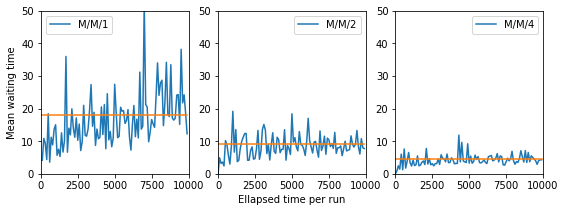

In [ ]:
#plotting convergence results
plt.figure(figsize=(9, 3))
plt.title("Convergence behaviour of M/M/n queues")
plt.subplot(131)
plt.plot(sim_time, means_sampsize1, label = "M/M/1")
plt.plot(sim_time, np.repeat(18.05, len(sim_time)))
plt.axis([0,10000, 0, 50]) 
plt.ylabel("Mean waiting time")
plt.legend()
plt.subplot(132)
plt.plot(sim_time, means_sampsize2, label = "M/M/2")
plt.plot(sim_time, np.repeat(9.05, len(sim_time)))
plt.axis([0,10000, 0, 50]) 
plt.xlabel("Ellapsed time per run")
plt.legend()
plt.subplot(133)
plt.plot(sim_time, means_sampsize3, label = "M/M/4")
plt.plot(sim_time, np.repeat(4.52, len(sim_time)))
plt.axis([0,10000, 0, 50]) 
plt.legend()
plt.savefig("Conv_behav.png")


In [ ]:
# Multiple runs for t-tests
n_servers = 1 
mu = 1    
rate_1 = 0.95      
sim_time = 10000   
rho_1 = rate_1 / (n_servers * mu)

means_repeat1 = []
for i in range(100):
  data1 = []
  env = simpy.Environment()
  env.process(setup_noprint(env, n_servers, mu, rate_1, data1))
# Execute!
  env.run(until=sim_time)
  means_repeat1.append(np.array(data1).mean())

In [ ]:
ttest_1samp(np.array(means_repeat1), 18.05)

Ttest_1sampResult(statistic=1.7209917214770853, pvalue=0.08837612969587588)

In [ ]:
n_servers = 2 
mu = 1    
rate_2 = 1.9      
sim_time = 10000
rho_2 = rate_2 / (n_servers * mu)

means_repeat2 = []
for i in range(100):
  data2 = []
  env = simpy.Environment()
  env.process(setup_noprint(env, n_servers, mu, rate_2, data2))
# Execute!
  env.run(until=sim_time)
  means_repeat2.append(np.array(data2).mean())

In [ ]:
ttest_1samp(np.array(means_repeat2), 9.05)

Ttest_1sampResult(statistic=-0.18894798014395686, pvalue=0.8505203998240388)

In [ ]:
n_servers = 4 
mu = 1    
rate_3 = 3.8     
sim_time = 10000
rho_3 = rate_3 / (n_servers * mu)


means_repeat3 = []
for i in range(100):
  data3 = []
  env = simpy.Environment()
  env.process(setup_noprint(env, n_servers, mu, rate_3, data3))
# Execute!
  env.run(until=sim_time)
  means_repeat3.append(np.array(data3).mean())

In [ ]:
ttest_1samp(np.array(means_repeat3), 4.52)

Ttest_1sampResult(statistic=-2.62603139519704, pvalue=0.010010265005788208)

In [ ]:
#two sample t-test with bonferroni correction
print(test12 = ttest_ind(means_repeat1, means_repeat2))
print(test23 = ttest_ind(means_repeat2, means_repeat3))
print(test13 = ttest_ind(means_repeat1, means_repeat3))



print(multipletests([test12[1],test13[1],test23[1]], method = "bonferroni"))

